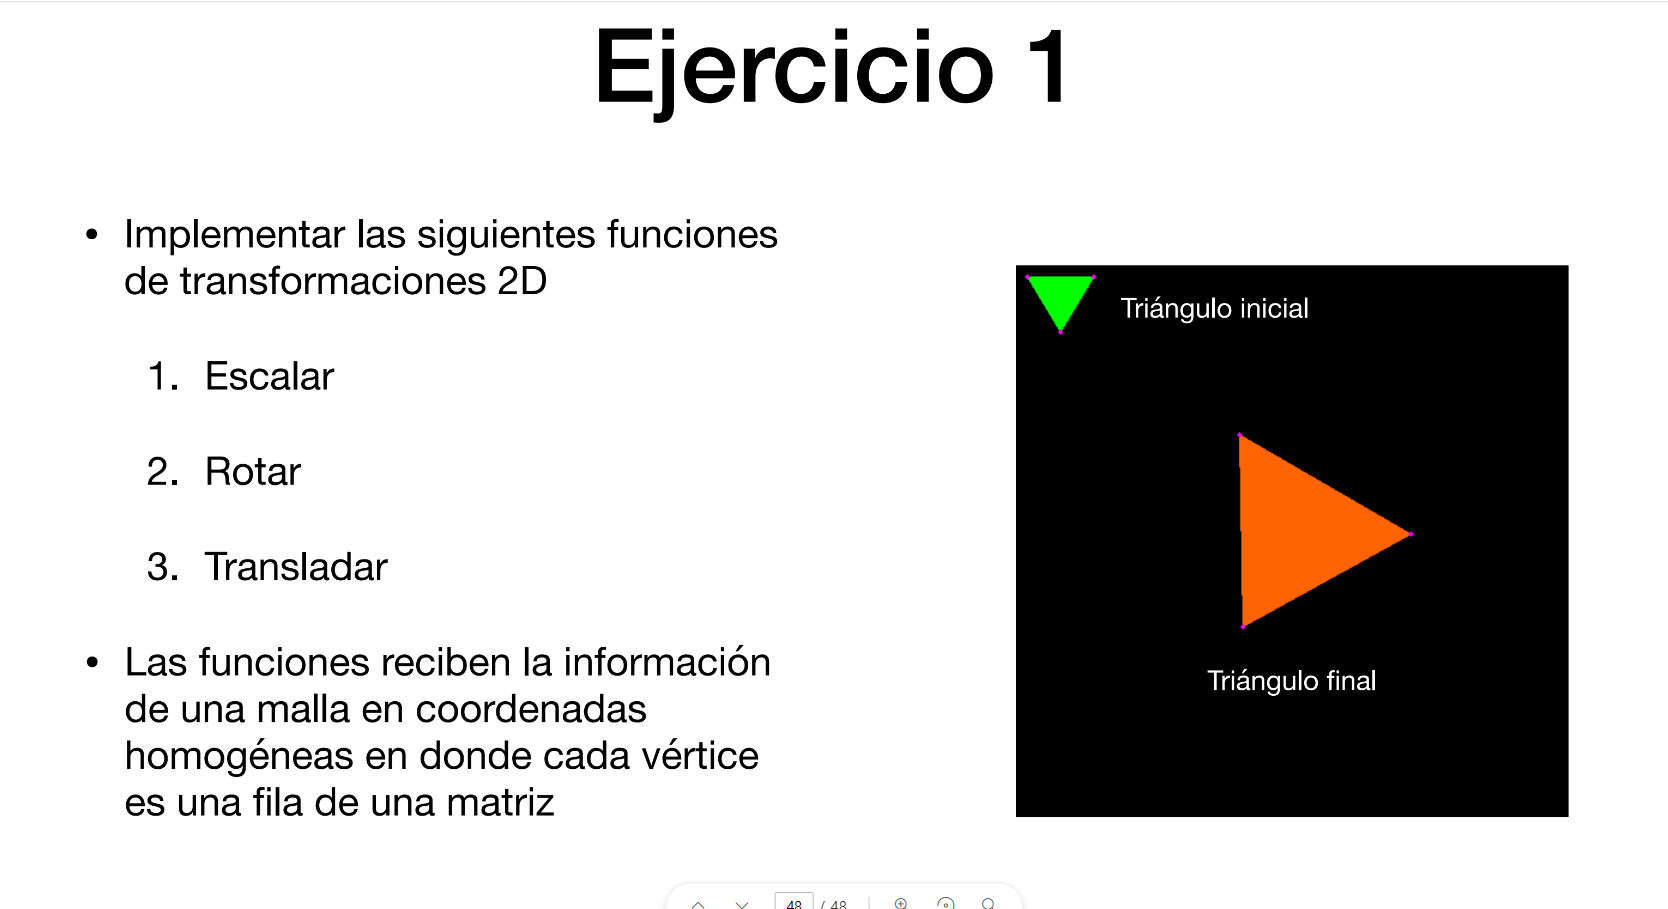

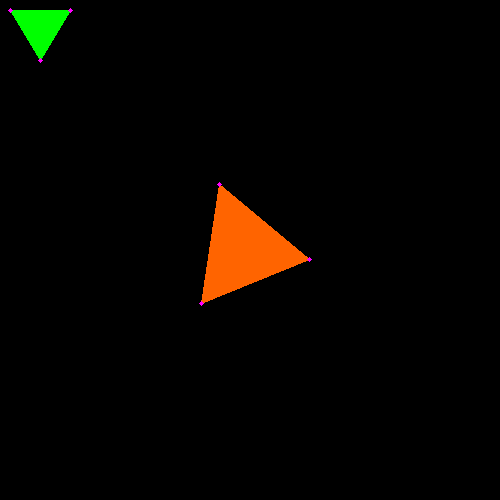

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv

def draw_triangle(im, triangle, color=(0,255,0)):
    # Normalizing homogeneous coordinates
    triangle = np.array([v[:-1]/v[-1] for v in triangle], np.uint16)
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)

def scale(vertex, sx, sy):
    t = np.array([[sx,0,0],[0,sy,0],[0,0,1]])
    v = t @ vertex.T
    return v.T

def rotate(vertex, a):
    t = np.array([[np.cos(a),-np.sin(a),0],[np.sin(a),np.cos(a),0],[0,0,1]])
    v = t @ vertex.T
    return v.T

def translate(vertex, dx, dy):
    t = np.array([[1,0,dx],[0,1,dy],[0,0,1]])
    v = t @ vertex.T
    return v.T

# image size
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

# Transformation parameters
angle = 30
s = 2
t = 250

# Image coordinate system
triangle1 = np.array([[10,10,1], [70,10,1], [40, 60,1]])
triangle2 = translate(rotate(scale(translate(triangle1, -40,-30), s, s), angle), t, t)

draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color=(0,100,255))

cv2_imshow(im)